In [1]:
pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 57.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8e0797da424e2e2684be121baf14205af99f9b31a33be70b922a02d10f462af9
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import cv2

In [3]:
# from skimage import data, exposure
# image = data.astronaut()
# image.dtype

In [4]:
img1 = cv2.imread('IMG_4066.jpg')
img2 = cv2.imread('N22.jpg')

In [5]:
img1.dtype

dtype('uint8')

(128, 128, 3)


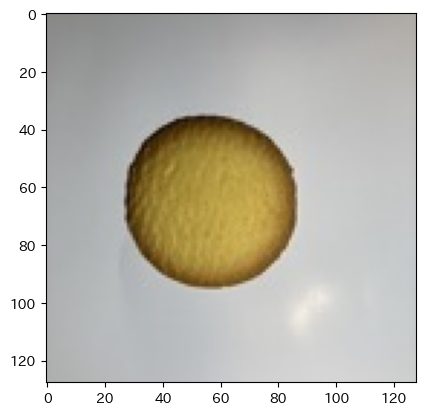

In [6]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
print(img1.shape)

(128, 128, 3)


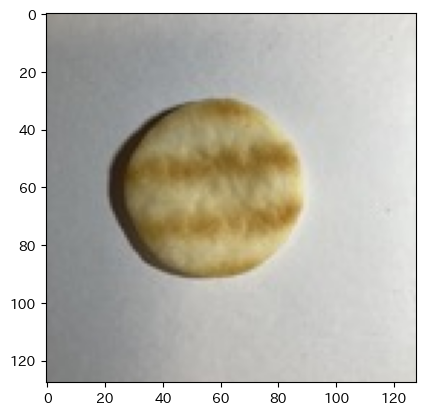

In [7]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(img2.shape)

### 色特徴量

In [8]:
def analyze_rgb(image):
  # Convert the image from BGR to RGB
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # Reshape the image to a 2D array where each row represents a pixel
  pixel_values = image_rgb.reshape((-1, 3))

  # Calculate mean, variance, and median for each color channel (R, G, B)
  r_mean = np.mean(pixel_values[:, 0])
  g_mean = np.mean(pixel_values[:, 1])
  b_mean = np.mean(pixel_values[:, 2])

  r_variance = np.var(pixel_values[:, 0])
  g_variance = np.var(pixel_values[:, 1])
  b_variance = np.var(pixel_values[:, 2])

  r_median = np.median(pixel_values[:, 0])
  g_median = np.median(pixel_values[:, 1])
  b_median = np.median(pixel_values[:, 2])

  return {
      'mean': {'R': r_mean, 'G': g_mean, 'B': b_mean},
      'variance': {'R': r_variance, 'G': g_variance, 'B': b_variance},
      'median': {'R': r_median, 'G': g_median, 'B': b_median}
  }

analysis_img1 = analyze_rgb(img1)
analysis_img2 = analyze_rgb(img2)

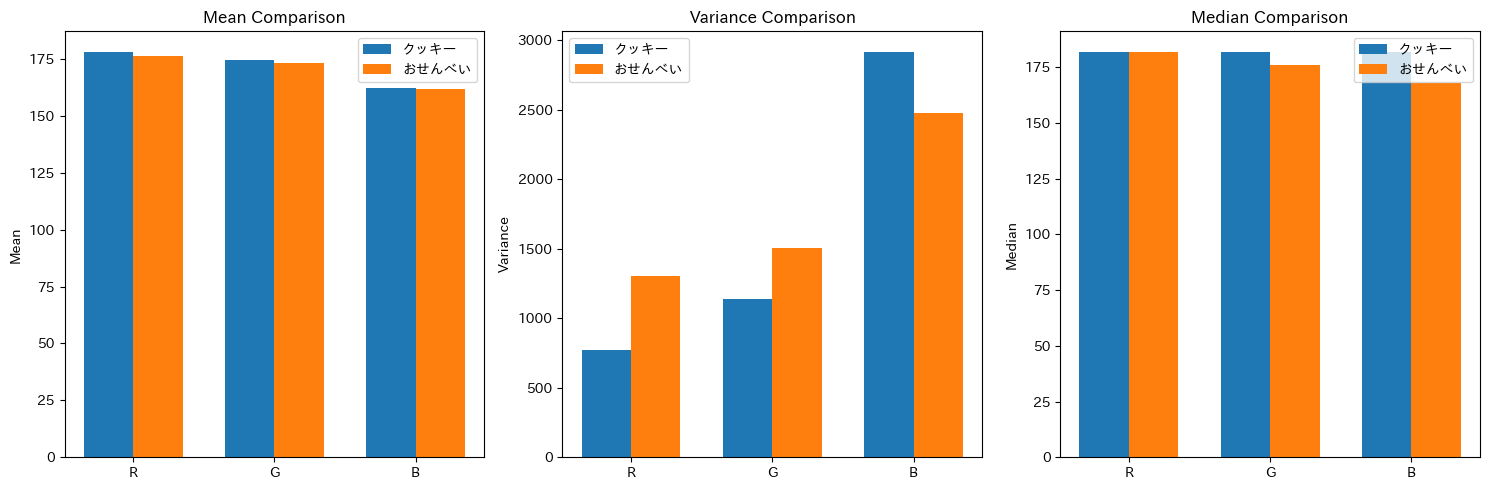

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot mean values
colors = ['red', 'green', 'blue']
labels = ['R', 'G', 'B']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

label1 = "クッキー"
label2 = "おせんべい"

rects1 = axes[0].bar(x - width/2, [analysis_img1['mean'][color] for color in labels], width, label=label1)
rects2 = axes[0].bar(x + width/2, [analysis_img2['mean'][color] for color in labels], width, label=label2)

# Add some text for labels, title and custom x-axis tick labels, etc.
axes[0].set_ylabel('Mean')
axes[0].set_title('Mean Comparison')
axes[0].set_xticks(x, labels)
axes[0].legend()

# Plot variance values
rects1 = axes[1].bar(x - width/2, [analysis_img1['variance'][color] for color in labels], width, label=label1)
rects2 = axes[1].bar(x + width/2, [analysis_img2['variance'][color] for color in labels], width, label=label2)

axes[1].set_ylabel('Variance')
axes[1].set_title('Variance Comparison')
axes[1].set_xticks(x, labels)
axes[1].legend()


# Plot median values
rects1 = axes[2].bar(x - width/2, [analysis_img1['median'][color] for color in labels], width, label=label1)
rects2 = axes[2].bar(x + width/2, [analysis_img2['median'][color] for color in labels], width, label=label2)

axes[2].set_ylabel('Median')
axes[2].set_title('Median Comparison')
axes[2].set_xticks(x, labels)
axes[2].legend()


plt.tight_layout()
plt.show()


### HOG

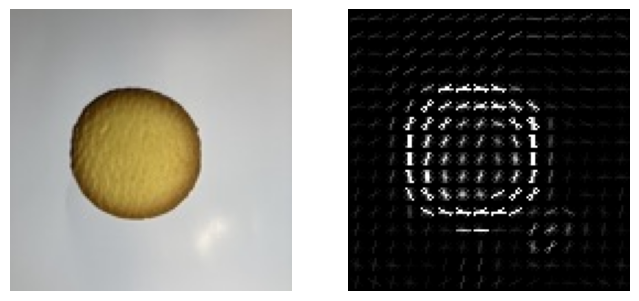

In [ ]:
from skimage.feature import hog
from skimage import exposure

# resized_img = cv2.resize(img1, (128, 128))

fd, hog_image = hog(
    img1,
    orientations=9,
    pixels_per_cell=(16, 16),
    cells_per_block=(2, 2),
    visualize=True,
    channel_axis=-1,
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

# 左側: RGB変換して表示
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
ax1.axis('off')
ax1.imshow(img_rgb)

# 右側: HOG画像（グレースケール）
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)

In [11]:
# こちらの形式のhogを特徴量として使ってよい（大きすぎれば、ダウンサイズを考える）
fd.shape

(8100,)

### LBP

In [12]:
from skimage.feature import local_binary_pattern

# settings for LBP
radius = 3 # 近くの半径何ピクセルを見るか
n_points = 8 * radius # 周上の見る点の数

# calculate LBP
lbp_img1 = local_binary_pattern(cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY), n_points, radius, method='uniform')
lbp_img2 = local_binary_pattern(cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY), n_points, radius, method='uniform')

print(lbp_img1.shape)
print(lbp_img2.shape)


(128, 128)
(128, 128)


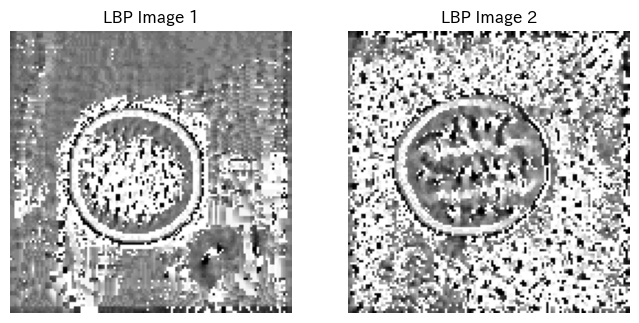

In [13]:
#  uniform LBP の場合：
#「ビットが0→1に変わる回数が2回以内」のパターンだけを個別にカウントして、残りは全部 non-uniform にまとめる
# 参考：https://qiita.com/tancoro/items/959ae9c14048c06bea8e

# display LBP images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(lbp_img1, cmap='gray')
ax1.set_title('LBP Image 1')

ax2.axis('off')
ax2.imshow(lbp_img2, cmap='gray')
ax2.set_title('LBP Image 2')

plt.show()

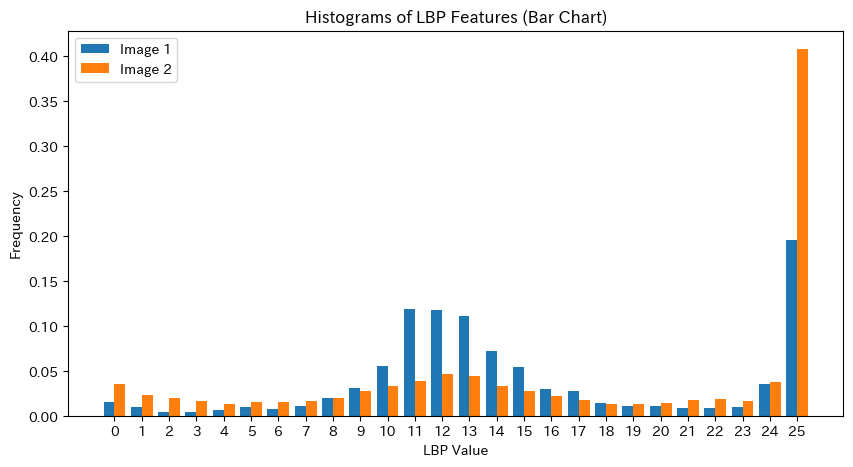

In [21]:
# Calculate histogram of LBP features
hist_img1, _ = np.histogram(lbp_img1.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
hist_img2, _ = np.histogram(lbp_img2.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Normalize histograms
hist_img1 = hist_img1.astype("float")
hist_img1 /= (hist_img1.sum() + 1e-7)

hist_img2 = hist_img2.astype("float")
hist_img2 /= (hist_img2.sum() + 1e-7)

# X軸の位置（binの番号）
x = np.arange(0, n_points + 2)  # 0 ~ n_points

plt.figure(figsize=(10, 5))
plt.bar(x - 0.2, hist_img1, width=0.4, label='Image 1', align='center')  # 位置をずらして重ならないように
plt.bar(x + 0.2, hist_img2, width=0.4, label='Image 2', align='center')

plt.xlabel('LBP Value')
plt.ylabel('Frequency')
plt.title('Histograms of LBP Features (Bar Chart)')
plt.legend()
plt.xticks(x)  # X軸の目盛を整数に
plt.show()


上記のヒストグラムを25次元の特徴量として使う

In [22]:
np.arange(0, n_points + 2)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

### SIFT

In [5]:
from skimage.feature import SIFT
from skimage.color import rgb2gray

# 画像の読み込みとグレースケール変換
gray_img1 = rgb2gray(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # skimageはfloat画像 (0~1) を使う

# SIFTインスタンス作成
sift = SIFT()
sift.detect_and_extract(gray_img1)

# 特徴点（キーポイント）の座標
keypoints1 = sift.keypoints  # (特徴点数, 2) 形式 (y座標, x座標)

# 特徴量（ディスクリプタ）
descriptors1 = sift.descriptors  # (特徴点数, 128次元)

print(f"Number of keypoints: {keypoints1.shape[0]}")
print(f"Descriptors shape: {descriptors1.shape}")  # (特徴点数, 128)


Number of keypoints: 17
Descriptors shape: (17, 128)


In [7]:
keypoints1

array([[37, 48],
       [42, 73],
       [54, 83],
       [59, 29],
       [60, 84],
       [69, 26],
       [71, 28],
       [83, 35],
       [84, 79],
       [87, 38],
       [90, 43],
       [93, 64],
       [94, 55],
       [94, 59],
       [76, 67],
       [99, 88],
       [60, 50]])

特徴点ごとに16個のセルに分け、各セルで8方向に分けるので、特徴量の次元は16*8=128

### scikit-imageいろいろ
#### region_prop

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

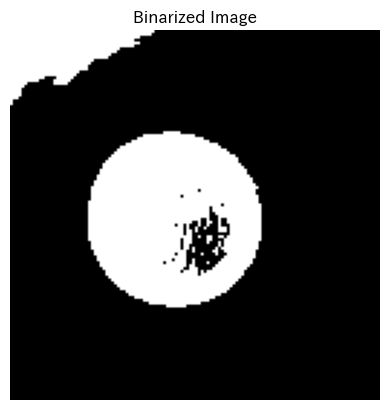

In [11]:
from skimage.measure import label, regionprops
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# グレースケール変換
gray = rgb2gray(img1)
thresh = threshold_otsu(gray)
binary = gray < thresh  # クッキーがTrueになるように反転

# 二値化画像を表示
plt.imshow(binary, cmap='gray')
plt.title('Binarized Image')
plt.axis('off')

In [24]:
# ラベリング & 領域抽出
label_img = label(binary)
props = regionprops(label_img)[0] # 0にすると左上から走査して最初のオブジェクトを拾う

# 特徴量例
area = props.area                # 面積
perimeter = props.perimeter      # 周囲長
eccentricity = props.eccentricity  # どれくらい楕円か（円なら0）

print(area)
print(perimeter)
print(eccentricity)

644.0
138.73401871576772
0.9196294313506058


なんかおかしい？ってなる

In [19]:
np.max(label_img)

np.int32(7)

In [20]:
regionprops(label_img)

0にすると左上から走査するから左上の白い部分が抽出されるので、もっとも面積の大きいオブジェクトを拾って、正しくクッキーのみ抽出するようにする

In [25]:
regions = regionprops(label_img)

# 最大の領域（面積が一番大きい）を取得
largest_region = max(regions, key=lambda r: r.area)

# その特徴量を使う
print(f"Largest region area: {largest_region.area}")
print(f"Perimeter: {largest_region.perimeter}")
print(f"Eccentricity: {largest_region.eccentricity}")

Largest region area: 2688.0
Perimeter: 347.7411613907041
Eccentricity: 0.13558590099298676


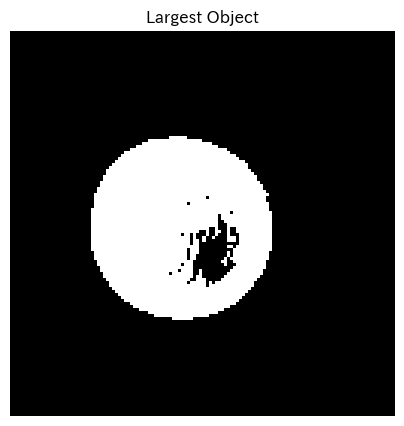

In [26]:
largest_mask = np.zeros_like(label_img, dtype=bool)

# 最大領域のラベル番号を取得
largest_label = largest_region.label

# 最大領域だけTrueにする
largest_mask[label_img == largest_label] = True

# 表示
plt.figure(figsize=(5, 5))
plt.imshow(largest_mask, cmap='gray')
plt.title('Largest Object')
plt.axis('off')
plt.show()

In [27]:
# 他にもいろいろな特徴量を計算できる
print("=== 最大オブジェクトの特徴量 ===")
print(f"面積 (area): {largest_region.area}")
print(f"周囲長 (perimeter): {largest_region.perimeter:.2f}")
print(f"重心 (centroid): {largest_region.centroid}")
print(f"外接矩形 (bbox): {largest_region.bbox}")
print(f"円形度 (eccentricity): {largest_region.eccentricity:.3f}")
print(f"長軸の長さ: {largest_region.major_axis_length:.2f}")
print(f"短軸の長さ: {largest_region.minor_axis_length:.2f}")
print(f"矩形率 (extent): {largest_region.extent:.3f}")
print(f"凸率 (solidity): {largest_region.solidity:.3f}")
print(f"等価直径: {largest_region.equivalent_diameter:.2f}")

=== 最大オブジェクトの特徴量 ===
面積 (area): 2688.0
周囲長 (perimeter): 347.74
重心 (centroid): (np.float64(64.37276785714286), np.float64(55.491815476190474))
外接矩形 (bbox): (35, 27, 96, 87)
円形度 (eccentricity): 0.136
長軸の長さ: 62.13
短軸の長さ: 61.56
矩形率 (extent): 0.734
凸率 (solidity): 0.912
等価直径: 58.50


### opencvいろいろ
opencvにはskimageのprop_regionみたいな関数はないが、個別にopencvを使う方が早いっていうメリットはある